In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('potreb.csv')
df.head()

,Код заявки,Дата выдачи,Возраст,Заемщик.Пол,СемейноеПоложение,Иждивенцы,Образование,Вид деятельности,Стаж,Стаж общий,Белый доход,"Месячный доход, руб.","Сумма кредита, тыс. руб.","Месячный платеж, руб.",Просрочек свыше 60 дн.
0,1,2/23/2005,33,Ж,Холост (незамужем),3 и более,Среднее,Наемный работник,От 3 до 5 лет,Свыше 5 лет,нет,11522,104,3671,0
1,2,2/27/2005,33,М,Холост (незамужем),0,Среднее,Наемный работник,От 1 до 3 лет,Свыше 5 лет,да,1131,178,6274,0
2,3,2/28/2005,54,М,Женат (замужем),0,Высшее,Наемный работник,менее 1 года,Свыше 5 лет,нет,7453,68,2346,0
3,4,2/28/2005,30,М,Женат (замужем),1-2,Высшее,Наемный работник,От 3 до 5 лет,Свыше 5 лет,да,14897,109,3902,0
4,5,2/28/2005,22,М,Холост (незамужем),0,Среднее,Наемный работник,От 1 до 3 лет,Свыше 5 лет,да,1191,78,2788,0


In [3]:
df.describe()

,Код заявки,Возраст,"Месячный доход, руб.","Сумма кредита, тыс. руб.","Месячный платеж, руб.",Просрочек свыше 60 дн.
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,534.500000,35.300562,16552.616105,159.842697,4721.619850,0.222846
std,308.449348,8.416107,9507.898829,59.130751,2007.929102,0.416351
min,1.000000,21.000000,0.000000,34.000000,1204.000000,0.000000
25%,267.750000,28.000000,10340.250000,114.000000,3320.500000,0.000000
50%,534.500000,34.000000,14512.000000,151.000000,4305.000000,0.000000
75%,801.250000,41.000000,19744.250000,196.000000,5730.750000,0.000000
max,1068.000000,57.000000,91449.000000,300.000000,22912.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
Код заявки                  1068 non-null int64
Дата выдачи                 1068 non-null object
Возраст                     1068 non-null int64
Заемщик.Пол                 1068 non-null object
СемейноеПоложение           1068 non-null object
Иждивенцы                   1068 non-null object
Образование                 1068 non-null object
Вид деятельности            1068 non-null object
Стаж                        1068 non-null object
Стаж общий                  1068 non-null object
Белый доход                 1068 non-null object
Месячный доход, руб.        1068 non-null int64
Сумма кредита, тыс. руб.    1068 non-null int64
Месячный платеж, руб.       1068 non-null int64
Просрочек свыше 60 дн.      1068 non-null int64
dtypes: int64(6), object(9)
memory usage: 125.2+ KB


In [5]:
target_name = 'Просрочек свыше 60 дн.'

In [6]:
target = df[target_name]
target.value_counts().head(4)

0    830
1    238
Name: Просрочек свыше 60 дн., dtype: int64

In [7]:
df['Иждивенцы'].value_counts()

1-2          567
0            476
3 и более     25
Name: Иждивенцы, dtype: int64

In [8]:
X = df.drop(['Дата выдачи', 'Код заявки', target_name], axis=1)
real_vars = [var for var in X.columns if X[var].unique().size > 3]
real_vars
X = pd.get_dummies(X)
MEANS, VARS, SUPS = X.mean(), X.std(), X.max()
X = X.div(SUPS)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 26 columns):
Возраст                                 1068 non-null float64
Месячный доход, руб.                    1068 non-null float64
Сумма кредита, тыс. руб.                1068 non-null float64
Месячный платеж, руб.                   1068 non-null float64
Заемщик.Пол_Ж                           1068 non-null float64
Заемщик.Пол_М                           1068 non-null float64
СемейноеПоложение_Другое                1068 non-null float64
СемейноеПоложение_Женат (замужем)       1068 non-null float64
СемейноеПоложение_Холост (незамужем)    1068 non-null float64
Иждивенцы_0                             1068 non-null float64
Иждивенцы_1-2                           1068 non-null float64
Иждивенцы_3 и более                     1068 non-null float64
Образование_Высшее                      1068 non-null float64
Образование_Среднее                     1068 non-null float64
Вид деятельности_Наемный 

In [9]:
real_vars

['Возраст',
 'Стаж',
 'Стаж общий',
 'Месячный доход, руб.',
 'Сумма кредита, тыс. руб.',
 'Месячный платеж, руб.']

In [10]:
from sklearn.feature_selection import mutual_info_classif, chi2

In [11]:
Xmutinf = pd.DataFrame({'var':X.columns, 'mutual': mutual_info_classif(X, target)}).sort_values('mutual', ascending=False)
Xmutinf

,mutual,var
0,0.024477,Возраст
23,0.023782,Стаж общий_Свыше 5 лет
2,0.020262,"Сумма кредита, тыс. руб."
25,0.011353,Белый доход_нет
6,0.009993,СемейноеПоложение_Другое
11,0.007343,Иждивенцы_3 и более
9,0.006454,Иждивенцы_0
12,0.006379,Образование_Высшее
22,0.005706,Стаж общий_От 3 до 5 лет
8,0.005352,СемейноеПоложение_Холост (незамужем)


In [12]:
Xchi2 = pd.DataFrame(np.c_[(X.columns, *chi2(X, target))], columns=['var', 'chi2', 'p']).sort_values('p')
Xchi2

,var,chi2,p
6,СемейноеПоложение_Другое,10.6829,0.00108131
21,Стаж общий_От 1 до 3 лет,8.30665,0.00395002
16,Стаж_От 1 до 3 лет,5.32204,0.0210574
22,Стаж общий_От 3 до 5 лет,3.70484,0.0542548
7,СемейноеПоложение_Женат (замужем),3.25432,0.0712354
18,Стаж_Свыше 5 лет,2.56296,0.109394
17,Стаж_От 3 до 5 лет,2.1107,0.146273
24,Белый доход_да,1.8827,0.170027
2,"Сумма кредита, тыс. руб.",1.62073,0.20299
15,Вид деятельности_Собственное дело,1.47754,0.22416


In [13]:
best_feats = set(Xmutinf.loc[Xmutinf.mutual > .01, 'var']).union(set(Xchi2.loc[Xchi2.p < .05, 'var']))
best_feats

{'Белый доход_нет',
 'Возраст',
 'СемейноеПоложение_Другое',
 'Стаж общий_От 1 до 3 лет',
 'Стаж общий_Свыше 5 лет',
 'Стаж_От 1 до 3 лет',
 'Сумма кредита, тыс. руб.'}

In [14]:
Xtr, Xte, ytr, yte = sklearn.model_selection.train_test_split(X, target, test_size=.32)

In [15]:
from sklearn import tree, metrics

In [16]:
from sklearn.model_selection import GridSearchCV

In [18]:
clf = GridSearchCV(
    tree.DecisionTreeClassifier(),
    [dict(
        criterion = ['gini', 'entropy'],
        max_depth = [2, 3, 4, 5, 6, 7, 8, 16],
    )],
    scoring=['neg_log_loss', 'f1', 'roc_auc'],
    refit='neg_log_loss',
    return_train_score=True
).fit(Xtr, ytr)
clf.best_params_

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'criterion': 'gini', 'max_depth': 2}

In [19]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,mean_score_time,mean_test_f1,mean_test_neg_log_loss,mean_test_roc_auc,mean_train_f1,mean_train_neg_log_loss,mean_train_roc_auc,param_criterion,param_max_depth,...,split2_train_neg_log_loss,split2_train_roc_auc,std_fit_time,std_score_time,std_test_f1,std_test_neg_log_loss,std_test_roc_auc,std_train_f1,std_train_neg_log_loss,std_train_roc_auc
0,0.001948,0.002315,0.000000,-0.692066,0.595524,0.019048,-0.489926,0.625376,gini,2,...,-4.855191e-01,0.649035,0.000167,0.000231,0.000000,0.267081,0.021757,0.026937,0.004209,0.023480
1,0.002243,0.002037,0.087022,-0.707325,0.590887,0.196850,-0.468700,0.669400,gini,3,...,-4.600284e-01,0.687956,0.000526,0.000559,0.098895,0.259137,0.010097,0.115682,0.008870,0.014531
2,0.001886,0.001653,0.097209,-1.029808,0.592188,0.265021,-0.442732,0.715913,gini,4,...,-4.289141e-01,0.732715,0.000059,0.000139,0.113963,0.093224,0.027425,0.144684,0.015380,0.018625
3,0.001908,0.001567,0.170749,-2.060531,0.562964,0.402056,-0.404567,0.766049,gini,5,...,-3.905277e-01,0.788369,0.000029,0.000053,0.079075,0.241266,0.045490,0.077684,0.016827,0.020992
4,0.002265,0.001700,0.156468,-3.533239,0.532817,0.537199,-0.339033,0.835686,gini,6,...,-3.311675e-01,0.839223,0.000142,0.000108,0.048514,0.721763,0.031647,0.069276,0.018918,0.006162
5,0.002486,0.001670,0.206840,-4.906075,0.512678,0.676002,-0.276113,0.890754,gini,7,...,-2.723585e-01,0.898021,0.000069,0.000007,0.046483,0.843808,0.053038,0.019171,0.012491,0.005320
6,0.002446,0.001612,0.248163,-6.063566,0.522670,0.743591,-0.220241,0.928738,gini,8,...,-2.189624e-01,0.932168,0.000212,0.000122,0.053146,1.318518,0.054517,0.019616,0.004809,0.005293
7,0.002881,0.001640,0.290428,-10.472258,0.548883,0.993383,-0.004413,0.999949,gini,16,...,-9.992007e-16,1.000000,0.000066,0.000097,0.044799,1.085660,0.033391,0.006209,0.003512,0.000048
8,0.001810,0.001696,0.000000,-1.010981,0.564607,0.019048,-0.489877,0.617673,entropy,2,...,-4.855191e-01,0.649035,0.000221,0.000064,0.000000,0.383465,0.022071,0.026937,0.004224,0.023267
9,0.001975,0.001539,0.012579,-1.154731,0.571861,0.086143,-0.467830,0.668899,entropy,3,...,-4.544777e-01,0.698247,0.000121,0.000016,0.017789,0.330064,0.012114,0.041013,0.010783,0.020801


In [20]:
sklearn.metrics.explained_variance_score(yte, clf.predict(Xte))

0.0

In [21]:
print(sklearn.metrics.classification_report(yte, clf.predict(Xte)))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86       257
          1       0.00      0.00      0.00        85

avg / total       0.56      0.75      0.64       342



/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
import graphviz

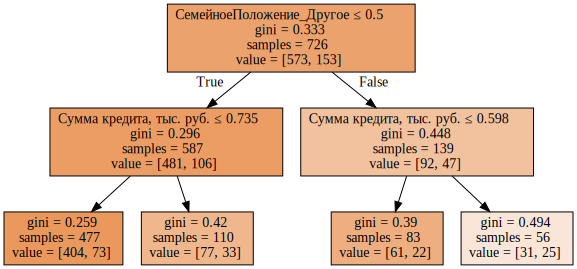

In [23]:
clfdot = tree.export_graphviz(
    clf.best_estimator_,
    out_file=None,
    feature_names=X.columns,
    filled=True,
    special_characters=True
)
graphviz.Source(clfdot)